In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

Initializing a Ship from Excel File
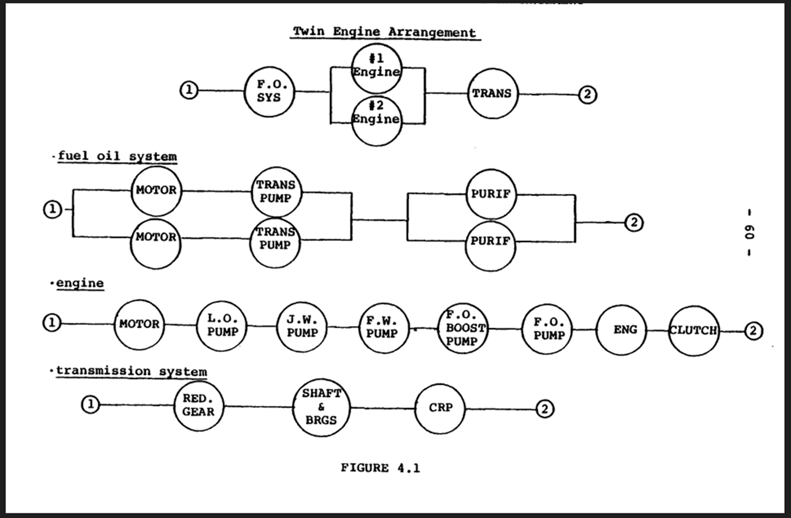

In [2]:
from shipClass.Ship import Ship

test_ship = Ship('EXCEL TEST SHIP', "AuxilaryPropulsionPlant_Reliability_Availability_Data.xlsx")

    # fuel system = [([5,6], [5,6]), (7,7)]


Parallel set: [[5, 6], [5, 6]]
[5, 6]
[5, 6]
Parallel set: [7, 7]
[(1, 2), (3, 4)]


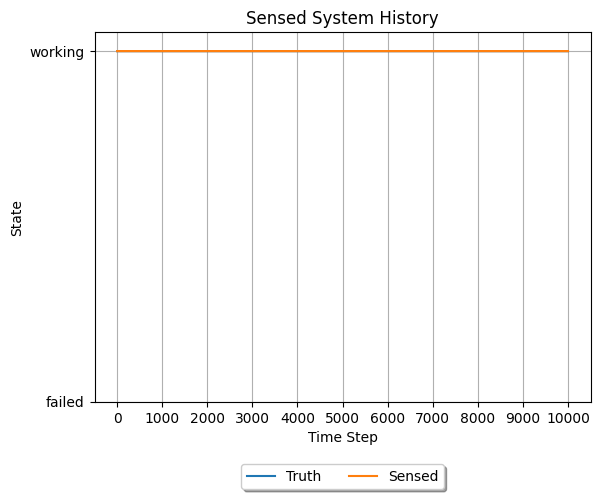

In [3]:
# test_ship.print_comp_names() 
# print(test_ship.systems['test system'].parallels)

test_ship.systems['fuel system'].simulate(10000)
test_ship.systems['fuel system'].plotHistory()
test_ship.systems['fuel system'].printHistory2Excel('testResults/ship_test-fuel_system.xlsx')